In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [29]:
def enhance_image(image, beta=0.5):
    image = tf.cast(image, tf.float64)
    image = ((1 + beta) * image) + (-beta * tf.math.reduce_mean(image))
    return image

def convert_contrast(inputFile):

    img = tf.io.read_file(inputFile)
    img = tf.io.decode_bmp(img, channels=3)
    # print(tf.rank(img))
    img = tf.cast(img, tf.float32)

    img = enhance_image(img, 0.3)
    # img =  tf.image.adjust_contrast(img, -4)
    proto_tensor = tf.make_tensor_proto(img)  # convert `tensor a` to a proto tensor
    return tf.make_ndarray(proto_tensor) # output: array([[1, 2, 3],

def gabor_filter(img):
    img = cv2.imread(inputFile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    g_kernel = cv2.getGaborKernel((20,20), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    return img

def convert_sobelxy(inputFile):
    img = cv2.imread(inputFile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.GaussianBlur(img,(7,7),0)
    img = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=11)
    img = cv2.Sobel(img,cv2.CV_32F,0,1,ksize=11)
    
    return img

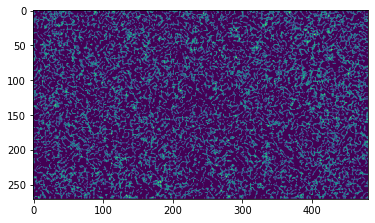

In [30]:
inputFile = "mura_data/RGB/test_data/defect/defect5.bmp"

defect_img = cv2.imread(inputFile)

plt.imshow(defect_img)



# defect_img = convert_contrast(inputFile)
defect_img = convert_sobelxy(inputFile)
# defect_img = gabor_filter(inputFile)
plt.imshow(defect_img.astype(np.uint8))
# defect_img = convert_SVD(defect_img)
# print(convert_SVD(defect_img).shape)
# print(convert_DCT(defect_img).shape)
# defect_img =  convert_DCT(defect_img) - convert_SVD(defect_img) + 128
# defect_img =  np.subtract(convert_DCT(defect_img), convert_SVD(defect_img))
# defect_img = np.add(defect_img, 128.0)


# defect_img = cv2.cvtColor(defect_img, cv2.COLOR_BGR2LAB)

# defect_img = opening_ops(defect_img)
# defect_img = closing_ops(defect_img)
# defect_img = histo_equalize(defect_img)
# defect_img = gabor_filter(defect_img)
# defect_img = histo_equalize(defect_img)

# defect_img = cv2.cvtColor(defect_img, cv2.COLOR_GRAY2RGB)
    


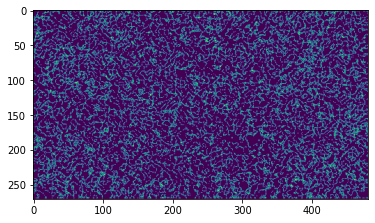

In [31]:
inputFile = "mura_data/RGB/test_data/normal/normal5.bmp"

normal_img = cv2.imread(inputFile)
plt.imshow(normal_img)

# normal_img = convert_contrast(inputFile)
normal_img = convert_sobelxy(inputFile)
# normal_img = gabor_filter(inputFile)
plt.imshow(normal_img.astype(np.uint8))
# # normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2GRAY)
# # normal_img = convert_SVD(normal_img)
# # normal_img = convert_DCT(normal_img) - convert_SVD(normal_img) + 128
# # normal_img = np.subtract(convert_DCT(defect_img), convert_SVD(defect_img))
# # normal_img = np.add(normal_img, 128.0)


# normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2LAB)

# normal_img = opening_ops(normal_img)
# normal_img = closing_ops(normal_img)
# normal_img = histo_equalize(normal_img)
# normal_img = gabor_filter(normal_img)
# normal_img = histo_equalize(normal_img)

# normal_img = cv2.cvtColor(normal_img, cv2.COLOR_GRAY2RGB)

